In [373]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score
import pickle

### Чтение данных

In [374]:
data = pd.read_excel('data/data_prep_model.xlsx')

In [375]:
data.head()

,material_type,electronegativity,ionic_radius,core_size,diameter,surface_charge,surface_area,cell_type,concentration,number_of_atoms,...,shape,synthesis_method,surface_charge_type,size_in_water,size_in_medium,zeta_in_medium,no_of_cells,aspect_ratio,pdi,toxicity
0,CuO,1.90,73.0,12.8,313.8,7.6,74.2,1.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZnO,1.65,74.0,22.6,114.7,28.8,47.4,0.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZnO,1.65,74.0,22.6,114.7,28.8,47.4,0.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZnO,1.65,74.0,22.6,69.4,28.8,47.4,1.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mn2O3,1.55,58.0,51.5,291.7,-46.1,25.9,1.0,200.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   material_type                   8627 non-null   object 
 1   electronegativity               6821 non-null   float64
 2   ionic_radius                    4350 non-null   float64
 3   core_size                       1627 non-null   float64
 4   diameter                        7798 non-null   float64
 5   surface_charge                  5369 non-null   float64
 6   surface_area                    1627 non-null   float64
 7   cell_type                       1627 non-null   float64
 8   concentration                   8409 non-null   float64
 9   number_of_atoms                 4350 non-null   float64
 10  molecular_weight                8611 non-null   float64
 11  topological_polar_surface_area  3415 non-null   float64
 12  a                               46

### Выделим категориальные признаки

In [377]:
cat_features = [
    'material_type', 'cell_type', 'type', 'coat', 
    'cell_line', 'human/animal', 'animal', 'cell_morphology', 
    'cell_age', 'cell_organ', 'test', 'test_indicator', 
    'biochemical_metrics', 'interference_test', 'colloidal_stability', 'positive_control', 
    'particle_id', 'shape', 'synthesis_method', 'surface_charge_type', 'toxicity', 'cell_line_bin'
    ]

In [378]:
for col in cat_features:
    data[col] = data[col].astype(str)
    data[col] = data[col].fillna('nan').replace('nan', 'null_obj')

In [379]:
data[cat_features].head()

,material_type,cell_type,type,coat,cell_line,human/animal,animal,cell_morphology,cell_age,cell_organ,...,biochemical_metrics,interference_test,colloidal_stability,positive_control,particle_id,shape,synthesis_method,surface_charge_type,toxicity,cell_line_bin
0,CuO,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
1,ZnO,0.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
2,ZnO,0.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
3,ZnO,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
4,Mn2O3,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj


### Введем случайный признак

In [380]:
import random

data['random'] = [random.random() for i in range(len(data))]

### Разделим данные на обучающую и тестовую выборки

In [381]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle=True, random_state=123)

### Обучим модель регрессии

In [367]:
model = CatBoostRegressor(
                        cat_features = cat_features, 
                        random_seed=123 
                        )

In [371]:
from sklearn.model_selection import GridSearchCV

parametrs = {
    'iterations': range(149, 151),
    'max_depth': range(9, 11),
    }

grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(data.drop('viability', axis=1), data['viability'].values)

Learning rate set to 0.367165
0:	learn: 27.8205896	total: 90ms	remaining: 8.73s
1:	learn: 25.5321719	total: 148ms	remaining: 7.11s
2:	learn: 24.2681104	total: 216ms	remaining: 6.84s
3:	learn: 23.3285932	total: 290ms	remaining: 6.82s
4:	learn: 22.5925924	total: 348ms	remaining: 6.47s
5:	learn: 21.8917764	total: 414ms	remaining: 6.35s
6:	learn: 21.4934124	total: 484ms	remaining: 6.3s
7:	learn: 21.2290069	total: 551ms	remaining: 6.19s
8:	learn: 20.8933480	total: 631ms	remaining: 6.24s
9:	learn: 20.5260145	total: 690ms	remaining: 6.07s
10:	learn: 20.3307297	total: 752ms	remaining: 5.95s
11:	learn: 20.2084027	total: 840ms	remaining: 6.02s
12:	learn: 20.0105671	total: 903ms	remaining: 5.9s
13:	learn: 19.8911219	total: 989ms	remaining: 5.93s
14:	learn: 19.6780610	total: 1.06s	remaining: 5.86s
15:	learn: 19.5603378	total: 1.13s	remaining: 5.78s
16:	learn: 19.1048503	total: 1.21s	remaining: 5.75s
17:	learn: 18.9453564	total: 1.27s	remaining: 5.67s
18:	learn: 18.5423966	total: 1.34s	remaining: 5

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000026A8ABB3BB0>,
             param_grid={'iterations': range(98, 101),
                         'max_depth': range(9, 11)})

In [372]:
grid.best_params_

{'iterations': 98, 'max_depth': 10}

In [382]:
from sklearn.model_selection import KFold

In [384]:
n_splits = 3


models = []
X = train_data.drop('viability', axis=1)
y = train_data['viability'].values

X_test_data = test_data.drop('viability', axis=1)
y_test_data = test_data['viability'].values

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = 123
# N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=kFold_random_state)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = CatBoostRegressor(
        iterations = 150,
        learning_rate=1,
        depth=10,
        cat_features = cat_features, 
        random_seed=kFold_random_state
        )
    models.append(model)

    model.fit(
        X_train, y_train, eval_set=(X_test, y_test),
        verbose = 500, use_best_model = True, plot = False
        )
        
assert len(models) == n_splits

# массив для записи финального результата
pred = np.zeros((len(X_test_data),))
scores = []
for model in models:
    pred += model.predict(X_test_data)
    scores.append(model.best_score_['validation']['RMSE'])
pred /= n_splits

0:	learn: 25.5231304	test: 26.7012105	best: 26.7012105 (0)	total: 93ms	remaining: 13.9s
149:	learn: 4.0856616	test: 20.8762593	best: 20.6792067 (40)	total: 13.5s	remaining: 0us

bestTest = 20.6792067
bestIteration = 40

Shrink model to first 41 iterations.
0:	learn: 24.9210976	test: 25.0297870	best: 25.0297870 (0)	total: 90.9ms	remaining: 13.5s
149:	learn: 3.7270017	test: 21.4475995	best: 21.0277705 (26)	total: 12.2s	remaining: 0us

bestTest = 21.02777047
bestIteration = 26

Shrink model to first 27 iterations.
0:	learn: 25.5903960	test: 26.5887563	best: 26.5887563 (0)	total: 75.6ms	remaining: 11.3s
149:	learn: 4.4440407	test: 21.8086102	best: 21.4295337 (53)	total: 12.4s	remaining: 0us

bestTest = 21.42953373
bestIteration = 53

Shrink model to first 54 iterations.


### Прогноз

In [385]:
# pred = model.predict(X_test)

### Метрики

In [386]:
print(
    'MAE: ', MAE(pred, y_test_data),
    '\nMRSE: ', MSE(pred, y_test_data)**0.5,
    '\nR2: ', r2_score(pred, y_test_data)
    )

MAE:  13.235402067114492 
MRSE:  18.719130682766956 
R2:  0.45771167495146425


<AxesSubplot:>

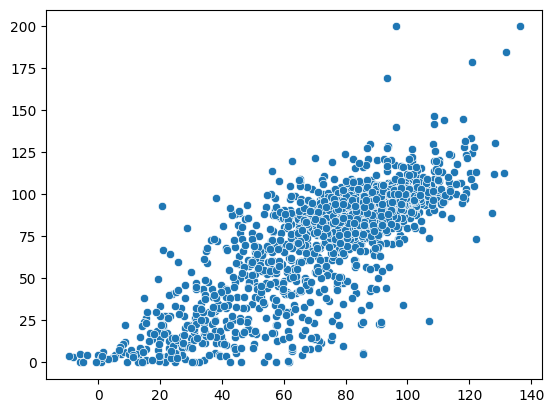

In [387]:
import seaborn as sns
sns.scatterplot(x=pred, y=y_test_data)

### SHAP

In [388]:
import shap
shap.initjs()

In [389]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

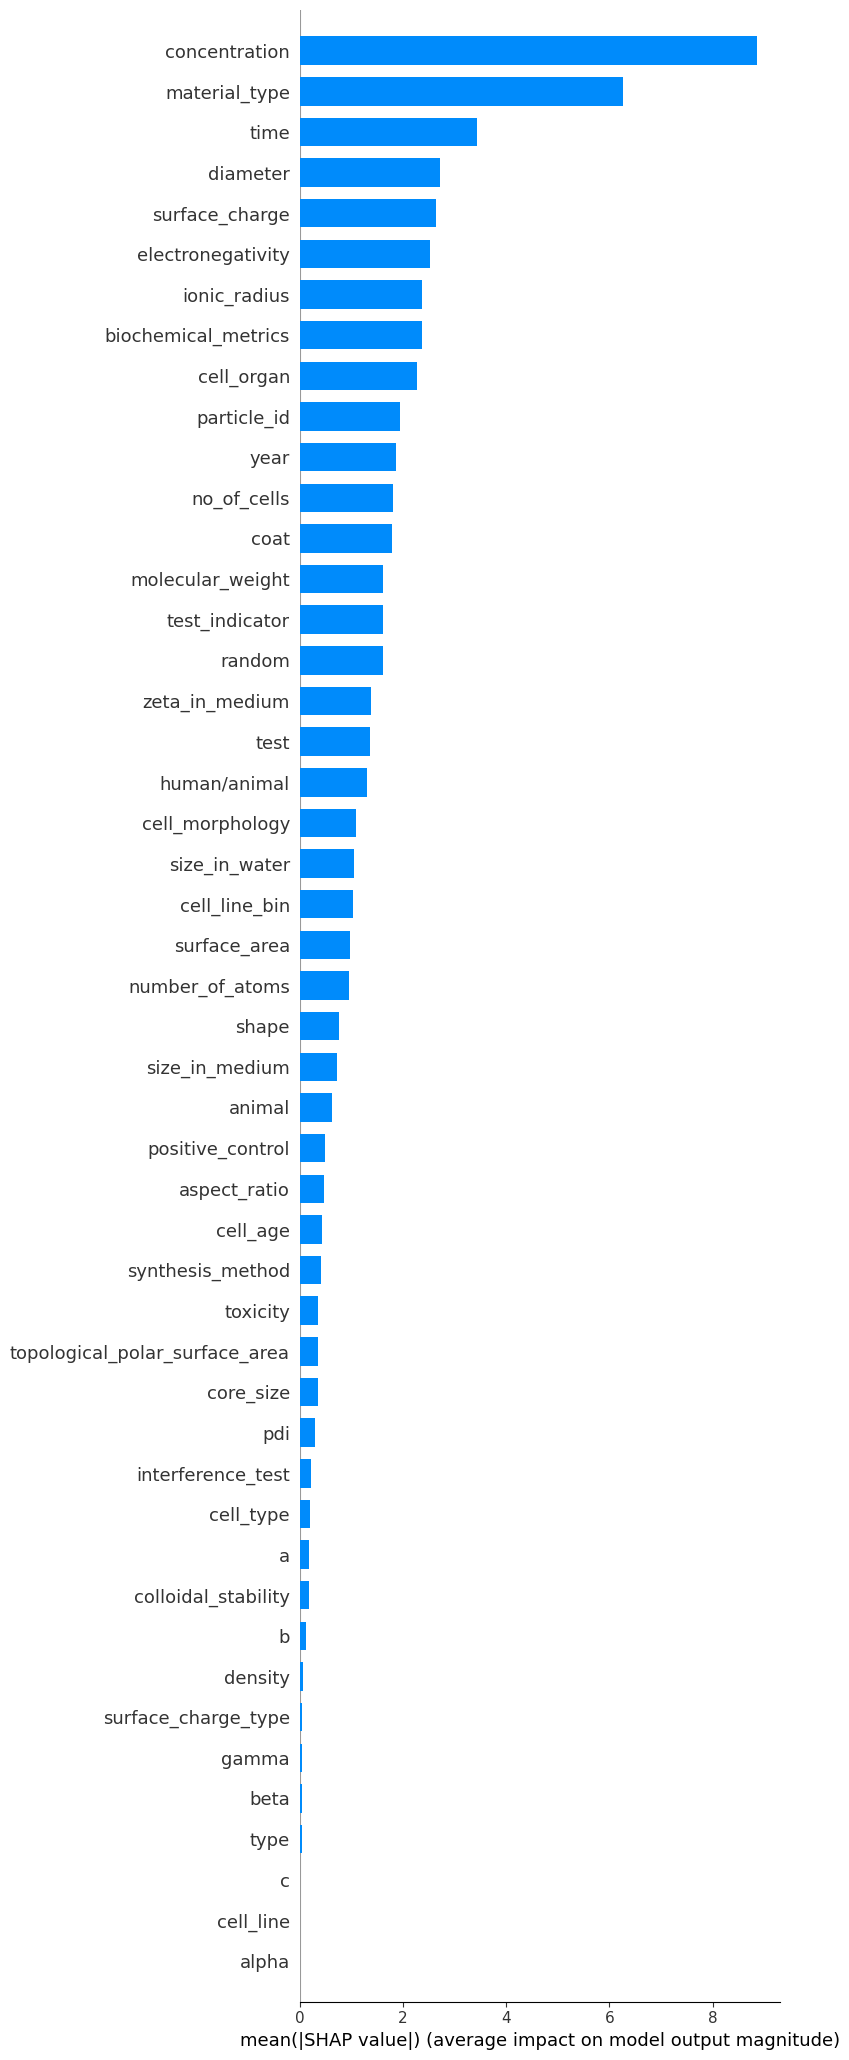

In [390]:
shap.summary_plot(shap_values, X, max_display=50, plot_type="bar")

In [391]:
feature_names = X.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
random_fi = shap_importance[shap_importance.col_name == 'random'].feature_importance_vals.values[0]
filtered_cols = shap_importance[shap_importance.feature_importance_vals > random_fi].col_name.to_list()

In [392]:
data = data[filtered_cols + ['viability']]

In [393]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle=True, random_state=123)

In [394]:
cat_features = list(set(cat_features) & set(filtered_cols))

In [395]:
cat_features

['particle_id',
 'coat',
 'cell_organ',
 'material_type',
 'biochemical_metrics',
 'test_indicator']

In [398]:
n_splits = 3


models = []
X = train_data.drop('viability', axis=1)
y = train_data['viability'].values

X_test_data = test_data.drop('viability', axis=1)
y_test_data = test_data['viability'].values

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = 123
# N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=kFold_random_state)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = CatBoostRegressor(iterations = 150,
                            learning_rate=1,
                            depth=10,
                            cat_features = cat_features, 
                            random_seed=kFold_random_state
                            )
    models.append(model)

    model.fit(
        X_train, y_train, eval_set=(X_test, y_test),
        verbose = 500, use_best_model = True, plot = False
        )
        
assert len(models) == n_splits

# массив для записи финального результата
pred = np.zeros((len(X_test_data),))
scores = []
for model in models:
    pred += model.predict(X_test_data)
    scores.append(model.best_score_['validation']['RMSE'])
pred /= n_splits

0:	learn: 24.6777029	test: 25.6192520	best: 25.6192520 (0)	total: 96.6ms	remaining: 14.4s
149:	learn: 5.7404270	test: 20.1171282	best: 20.0409614 (123)	total: 10.3s	remaining: 0us

bestTest = 20.04096139
bestIteration = 123

Shrink model to first 124 iterations.
0:	learn: 23.8750303	test: 25.0169835	best: 25.0169835 (0)	total: 58.9ms	remaining: 8.78s
149:	learn: 5.6782065	test: 20.8705775	best: 20.3084835 (62)	total: 10.7s	remaining: 0us

bestTest = 20.30848355
bestIteration = 62

Shrink model to first 63 iterations.
0:	learn: 25.1257723	test: 26.1358905	best: 26.1358905 (0)	total: 59ms	remaining: 8.79s
149:	learn: 5.8477531	test: 20.8245132	best: 20.7624750 (138)	total: 10.6s	remaining: 0us

bestTest = 20.76247503
bestIteration = 138

Shrink model to first 139 iterations.


In [399]:
print(
    'MAE: ', MAE(pred, y_test_data),
    '\nMRSE: ', MSE(pred, y_test_data)**0.5,
    '\nR2: ', r2_score(pred, y_test_data)
    )

MAE:  12.216613463377751 
MRSE:  17.468238201255595 
R2:  0.5549674697275815


In [400]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

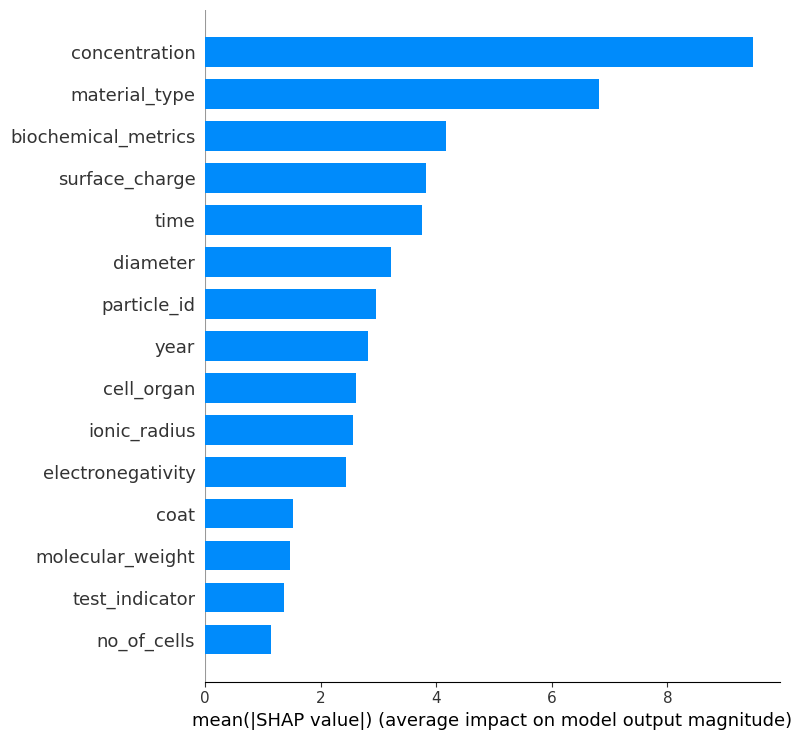

In [401]:
shap.summary_plot(shap_values, X, max_display=50, plot_type="bar")

### Обучаемся на всем датасете

In [402]:
model_final = CatBoostRegressor(
                        iterations = 150,
                        learning_rate=1,
                        depth=10,
                        cat_features = cat_features, 
                        random_seed=123 
                        )


In [403]:
model_final.fit(
    data.drop('viability', axis=1), 
    data['viability'].values,
    verbose = 500, 
    use_best_model = True, 
    plot = False
    )

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 24.9965920	total: 74.5ms	remaining: 11.1s
149:	learn: 7.8332954	total: 11.8s	remaining: 0us


In [404]:
model_final.save_model('test_model')

In [49]:
# model.save_model('test_model')

In [405]:
data.drop('viability', axis=1).to_excel('data/X_test.xlsx', index=False)

In [408]:
data.drop('viability', axis=1)[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   particle_id          8627 non-null   object
 1   coat                 8627 non-null   object
 2   cell_organ           8627 non-null   object
 3   material_type        8627 non-null   object
 4   biochemical_metrics  8627 non-null   object
 5   test_indicator       8627 non-null   object
dtypes: object(6)
memory usage: 404.5+ KB


In [409]:
cat_features

['particle_id',
 'coat',
 'cell_organ',
 'material_type',
 'biochemical_metrics',
 'test_indicator']

In [52]:
tmp = pd.read_excel('data/X_test.xlsx')

In [53]:
tmp[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   material_type        1726 non-null   object
 1   cell_type            1726 non-null   object
 2   type                 1726 non-null   object
 3   coat                 1726 non-null   object
 4   cell_line            1726 non-null   object
 5   human/animal         1726 non-null   object
 6   animal               1726 non-null   object
 7   cell_morphology      1726 non-null   object
 8   cell_age             1726 non-null   object
 9   cell_organ           1726 non-null   object
 10  test                 1726 non-null   object
 11  test_indicator       1726 non-null   object
 12  biochemical_metrics  1726 non-null   object
 13  interference_test    1726 non-null   object
 14  colloidal_stability  1726 non-null   object
 15  positive_control     1726 non-null   object
 16  partic

In [54]:
model.predict(tmp)

array([83.85963012, 29.94814314, 21.58502099, ..., 57.65599567,
       20.34968892, 65.78902862])